# Capstone Project - H&M Recommendation

Ana Berta Vegas; Ester Iglesias; Raquel Dominguez

## Customers

En aquest notebook estudiarem el dataset "customers".

En primer lloc, importem les llibreries necessàries:

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

Llegim les dades a tractar i observem quina informació contenen:

In [2]:
df_customers = pd.read_csv('customers.csv')

In [3]:
df_customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [4]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


El dataset consisteix en 1371980 observacions amb la següent informació per a cada una:
- **customer_id**: id del client     
- **FN**: (Fashion News) si el client rep la revista de moda (categorica binaria: 1 (Si) o NaN (No))
- **Active**: el client rep comunicacio de las revistas de moda (categorica binaria: 1 (Si) o NaN (No))
- **club_member_status**: estat del soci cliente
- **fashion_news_frequency**: frequencia amb la que miren las noticies de moda
- **age**: edat del client
- **postal_code**: codi postal

Les variables anteriors, les classifiquem segons siguin numèriques o categòriques:
- **Numèriques**: age
- **Categòriques**: customer_id, FN, Active, club_member_status, fashion_news_frequency, postal_code

Modifiquem el tipus de les variables que correspongui, per tal que sigui coherent amb la classificació anterior:

In [5]:
df_customers["customer_id"] = df_customers["customer_id"].astype("category")

In [6]:
df_customers["FN"] = df_customers["FN"].astype("category")

In [7]:
df_customers["Active"] = df_customers["Active"].astype("category")

In [8]:
df_customers["club_member_status"] = df_customers["club_member_status"].astype("category")

In [9]:
df_customers["fashion_news_frequency"] = df_customers["fashion_news_frequency"].astype("category")

In [10]:
df_customers["postal_code"] = df_customers["postal_code"].astype("category")

Netejem el dataset i borrem les files repetides, ja que no aporten cap valor afegit a l'anàlisi:

In [11]:
df_customers.drop_duplicates(inplace=True, ignore_index=True)

In [12]:
df_customers.shape

(1371980, 7)

Observem que no s'ha borrat cap fila, és a dir, no hi havia dades repetides.

Veiem ara, una primera descripció de les variables numèriques (en aquest cas, l'edat):

In [13]:
df_customers.describe()

,age
count,1.356119e+06
mean,3.638696e+01
std,1.431363e+01
min,1.600000e+01
25%,2.400000e+01
50%,3.200000e+01
75%,4.900000e+01
max,9.900000e+01


<AxesSubplot:>

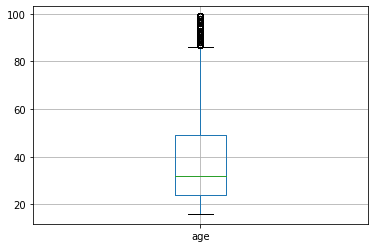

In [14]:
df_customers.boxplot()

Com a característiques a destacar, observem que la mitjana d'edat dels consumidors és de 36,38 anys, i que més de la meitat de clients tenen entre 24 i 49 anys. A més, hi ha una serie de clients atípics d'edat gran (més de 85).


Estudiem ara les variables categòriques:

In [15]:
df_customers.describe(include='category')

,customer_id,FN,Active,club_member_status,fashion_news_frequency,postal_code
count,1371980,476930.0,464404.0,1365918,1355971,1371980
unique,1371980,1.0,1.0,3,4,352899
top,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,1.0,1.0,ACTIVE,NONE,2c29ae653a9282cce4151bd87643c907644e09541abc28...
freq,1,476930.0,464404.0,1272491,877711,120303


A continuació fem un estudi per cada una de les variables. En primer lloc, mirem si hi ha alguna fila amb algun valor buit:

In [16]:
df_customers.isnull().values.any()

True

Observem que si que hi ha valors buits, veiem per a quina variable passa:

In [17]:
df_customers.isnull().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

Hi ha valors nuls per a totes les característiques excepte per customer_id i postal_code. Amb el respectiu anàlisi de cada variable tractarem aquests valors nuls.

**customer_id**

In [18]:
df_customers["customer_id"].value_counts()

00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657    1
aaabd1b7c85e6139d6c80addf788b1fde89f52dd71edabfeef699117078ca7d1    1
aaabafd8f1490fb3cb830f363c766568b8c53e8daf938e7262ebc58ac1417a09    1
aaabad72467637cd672a021d2699c2bfb02736cdf53d64e8f3385b623cf9dd1e    1
aaab82bd88837ce6490c66c82954aa1e6d59ca1ae6afcb87a86065cfcf96fb70    1
                                                                   ..
557716a29afd925a80a972134bf6f63fb24943ed1cd33e33850578d429f05189    1
55771330f2fc1075c0a65181ddc963dd0630c61cc51180414195d9f18d4e584b    1
557707059a44632a572fc1cb5676c5f874d27924b28bedfd016c78a36a4b6a40    1
557705fcf5be9236da875c5546485cc96d607dc9fec13506ae3a5182eeb66931    1
ffffd9ac14e89946416d80e791d064701994755c3ab686a1eaf3458c36f52241    1
Name: customer_id, Length: 1371980, dtype: int64

Hi ha un total de 1371980 clients diferents.

**FN**

In [19]:
df_customers["FN"].value_counts()

1.0    476930
Name: FN, dtype: int64

Observem que l'únic valor que pren la variable FN és 1. És a dir, es tracta d'una variable categòrica binaria, que pren el valor de 1 (SÍ) o NaN (NO). Canviem tots els NaN per un 0, que representarà el NO:

In [20]:
df_customers["FN"] = df_customers["FN"].cat.add_categories(0).fillna(0)

In [21]:
df_customers["FN"].isnull().values.any()

False

Observem que fent el canvi, ja no tenim valors nuls.

Amb la transformació aplicada, podem quantificar quants clients reben la revista i quants no:

In [22]:
df_customers["FN"].value_counts()

0.0    895050
1.0    476930
Name: FN, dtype: int64

In [23]:
df_customers["FN"].value_counts(normalize = True)

0.0    0.652378
1.0    0.347622
Name: FN, dtype: float64

És a dir, hi ha 895050 (65,2%) clients que sí que reben la revista i 476930 (34,8%) que no.

Veiem-ho, també, de manera gràfica:

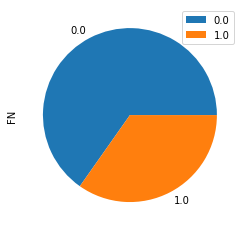

In [24]:
df_customers["FN"].value_counts().plot(kind='pie', legend=bool);

**Active**

In [25]:
df_customers["Active"].value_counts()

1.0    464404
Name: Active, dtype: int64

Observem que l'únic valor que pren la variable Active és 1. És a dir, es tracta d'una variable categòrica binaria, que pren el valor de 1 (SÍ) o NaN (NO). Canviem tots els NaN per un 0, que representarà el NO:

In [26]:
df_customers["Active"] = df_customers["Active"].cat.add_categories(0).fillna(0)

In [27]:
df_customers["Active"].isnull().values.any()

False

Observem que fent el canvi, ja no tenim valors nuls.

Amb la transformació aplicada, podem quantificar quants clients reben comunicació i quants no:

In [28]:
df_customers["Active"].value_counts()

0.0    907576
1.0    464404
Name: Active, dtype: int64

In [29]:
df_customers["Active"].value_counts(normalize = True)

0.0    0.661508
1.0    0.338492
Name: Active, dtype: float64

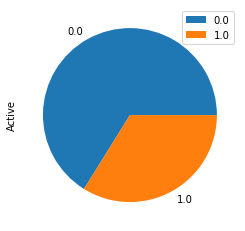

In [30]:
df_customers["Active"].value_counts().plot(kind='pie', legend=bool);

Hi ha un total de 464404 (33,8%) clients que reben communicació i 907576 (66,2%) que no.



**club_member_status**

In [31]:
df_customers["club_member_status"].value_counts()

ACTIVE        1272491
PRE-CREATE      92960
LEFT CLUB         467
Name: club_member_status, dtype: int64

Observem que la variable club_member_status pot prendre els valors ACTIVE, PRE-CREATE, LEFT CLUB. En aquest cas, els valors nuls es corresponen als clients que no són membres de la botiga. Canviem doncs, tots els NaN a NO-MEMBER. 

In [32]:
df_customers["club_member_status"] = df_customers["club_member_status"].cat.add_categories("NO-MEMBER").fillna("NO-MEMBER")

In [33]:
df_customers["club_member_status"].isnull().values.any()

False

Observem que fent el canvi, ja no tenim valors nuls.

Amb la transformació aplicada, estudiem quants clients hi ha de cada tipus:

In [34]:
df_customers["club_member_status"].value_counts()

ACTIVE        1272491
PRE-CREATE      92960
NO-MEMBER        6062
LEFT CLUB         467
Name: club_member_status, dtype: int64

In [35]:
df_customers["club_member_status"].value_counts(normalize = True)

ACTIVE        0.927485
PRE-CREATE    0.067756
NO-MEMBER     0.004418
LEFT CLUB     0.000340
Name: club_member_status, dtype: float64

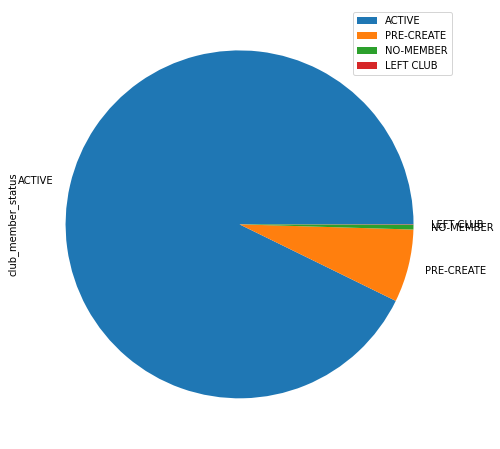

In [36]:
df_customers["club_member_status"].value_counts().plot(kind='pie', legend=bool, figsize=(8,8));

Com a observació interessant, es destaca que més d'un 92% dels clients és un membre actiu.


**fashion_news_frequency**

In [37]:
df_customers["fashion_news_frequency"].value_counts()

NONE         877711
Regularly    477416
Monthly         842
None              2
Name: fashion_news_frequency, dtype: int64

La variable fashion_news_frequency és una variable categorica que pren els següents valors: NONE, Regularly, Monthly, None. Observem que cal unificar els valors NONE i None, ja que tenen el mateix significat.

In [38]:
df_customers["fashion_news_frequency"]= df_customers["fashion_news_frequency"].str.lower().astype("category")

In [39]:
df_customers["fashion_news_frequency"].value_counts()

none         877713
regularly    477416
monthly         842
Name: fashion_news_frequency, dtype: int64

Pel que fa als valors nuls, els canviarem per N/A, ja que se suposa que no hi ha informació disponible.

In [40]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   customer_id             1371980 non-null  category
 1   FN                      1371980 non-null  category
 2   Active                  1371980 non-null  category
 3   club_member_status      1371980 non-null  category
 4   fashion_news_frequency  1355971 non-null  category
 5   age                     1356119 non-null  float64 
 6   postal_code             1371980 non-null  category
dtypes: category(6), float64(1)
memory usage: 79.6 MB


In [41]:
df_customers["fashion_news_frequency"] = df_customers["fashion_news_frequency"].cat.add_categories("N/A").fillna("N/A")

In [42]:
df_customers["fashion_news_frequency"].isnull().values.any()

False

Observem que ja no hi ha valors nuls. Veiem quina quantitat de clients correspon a cada classe:

In [43]:
df_customers["fashion_news_frequency"].value_counts()

none         877713
regularly    477416
N/A           16009
monthly         842
Name: fashion_news_frequency, dtype: int64

In [44]:
df_customers["fashion_news_frequency"].value_counts(normalize = True)

none         0.639742
regularly    0.347976
N/A          0.011669
monthly      0.000614
Name: fashion_news_frequency, dtype: float64

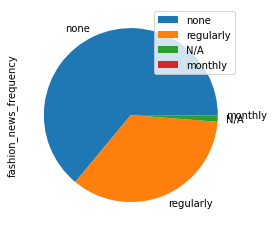

In [45]:
df_customers["fashion_news_frequency"].value_counts().plot(kind='pie', legend=bool);

La majoria de clients (877713 - 64%) no consulta la Fashion News, 477416 (34,8%) ho fan regularment i una minoria molt petita (842 - 0,06%) ho fa mensualment. Per 16009 (1,16%) clients no tenim informació.

**age**

In [46]:
df_customers["age"].value_counts()

21.0    67530
24.0    56124
20.0    55196
25.0    54989
23.0    54867
        ...  
98.0        7
97.0        4
93.0        4
96.0        3
94.0        3
Name: age, Length: 84, dtype: int64

Veiem gràficament com es comporta l'edat dels consumidors:

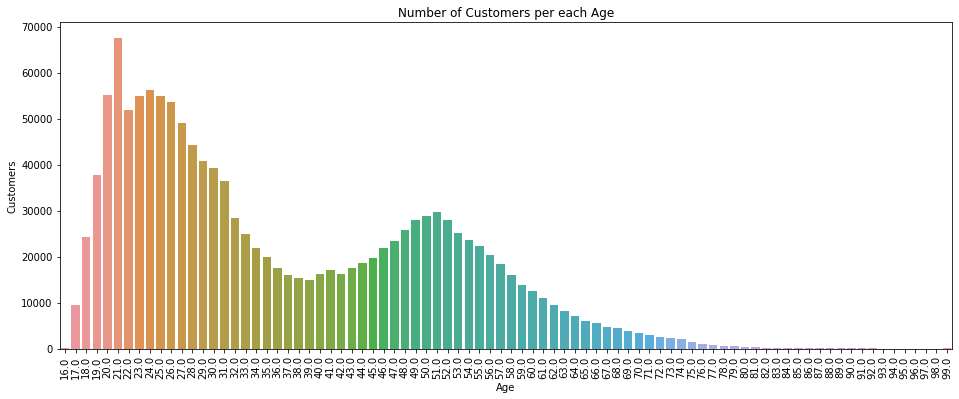

In [47]:
df = pd.DataFrame({'Age': df_customers.groupby(["age"])["customer_id"].count().index,
                   'Customers': df_customers.groupby(["age"])["customer_id"].count().values
                  })
df = df.sort_values(['Age'], ascending=False)
plt.figure(figsize = (16,6))
plt.title(f'Number of Customers per each Age')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Age', y="Customers", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

Anteriorment hem vist que la mitjana de l'edat era de 36,38 anys. En el gràfic anterior es pot veure que hi ha dos rangs d'edat que predominen respecte els altres. El primer, i el que té més influència seria de 19 a 31 anys i el segon de 47 a 54 anys. Per contemplar aquests dos rangs a l'hora de substituir els valors nuls, canviarem els valors NaN per la mediana:

In [48]:
df_customers["age"] = df_customers["age"].fillna(df_customers["age"].median())

In [49]:
df_customers["age"].isnull().values.any()

False

Observem que ja no hi ha valors nuls. Si tornem a representar gràficament l'edat tenim:

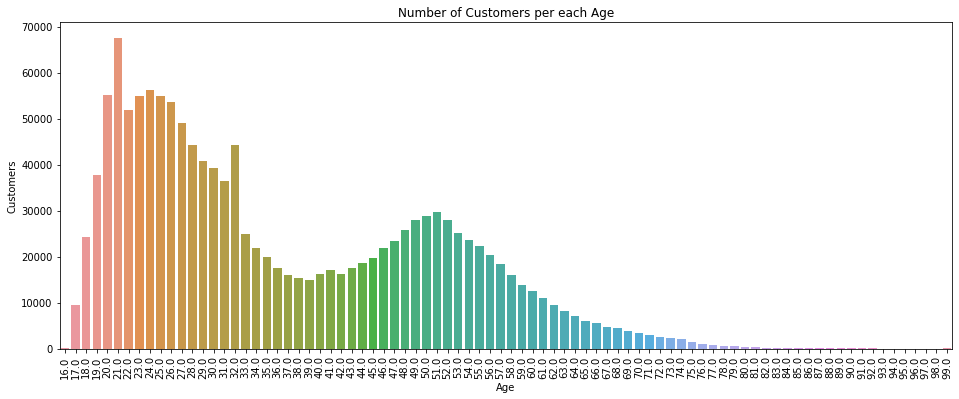

In [50]:
df = pd.DataFrame({'Age': df_customers.groupby(["age"])["customer_id"].count().index,
                   'Customers': df_customers.groupby(["age"])["customer_id"].count().values
                  })
df = df.sort_values(['Age'], ascending=False)
plt.figure(figsize = (16,6))
plt.title(f'Number of Customers per each Age')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Age', y="Customers", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

Observem que els rangs d'edat que predominaven es mantenen, pel que es considera una bona alternativa.

**postal_code**

In [51]:
df_customers["postal_code"].value_counts()

2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c    120303
cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac5ec985080fd92243c8       261
714976379549eb90aae4a71bca6c7402cc646ae7c40f6c1cb91d4b5a18623fc1       159
7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5d1e4ba6a75456b96a7       157
5b7eb31eabebd3277de632b82267286d847fd5d44287ee150bb4206b48439145       156
                                                                     ...  
5e14f1b9db2fc96d22ed0a48462e684061ee81ab82b36e57fd348ed945b63105         1
c4873af1061bd5be842d810d9d8549941befa4f4aaf56aeb86b19c3971e7ae4d         1
5e153c2cb31cce8575346a7b165527a58d49d5223cfd64dcefe2a8830e44333a         1
c48723f620fb40095368752f0dc577b5575dea418bea6e1991bb77d25f132d65         1
0000198d2c593b7d3df5a35282b74cf3a487b066286b2beab55d4f5ac2b16127         1
Name: postal_code, Length: 352899, dtype: int64

Observem que hi ha un codi postal des d'on es realitzen la gran majoria de les compres.

Finalment, exportem el dataset modificat per a utilitzar-lo per el model:

In [52]:
df_customers.to_csv('customers_model.csv',index=False)